In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os
import cv2
import numpy as np
from skimage import feature
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
%matplotlib inline
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Lambda
from keras import optimizers
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob

In [5]:
!pip install imutils
from imutils import paths
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

## Original Data Before Preprocessing

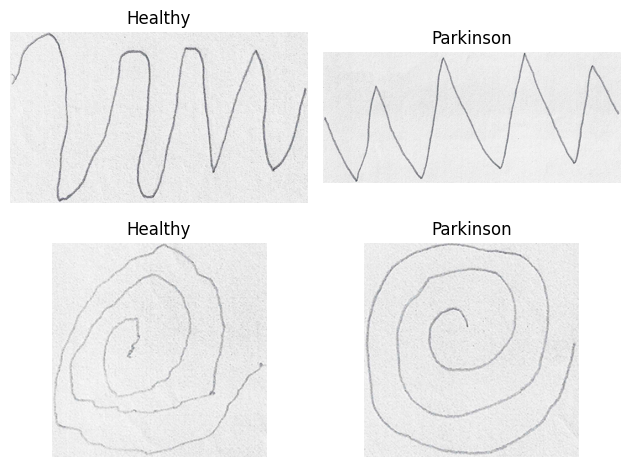

In [ ]:
# Load and display data images
imagePaths = list(paths.list_images('/content/drive/MyDrive/to_be_submitted/original_data/'))
image1 = cv2.imread(imagePaths[66])
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(imagePaths[36])
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread(imagePaths[170])
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.imread(imagePaths[104])
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display the first image
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Healthy')
plt.axis('off')

# Display the second image
plt.subplot(2, 2, 2)
plt.imshow(image2)
plt.title('Parkinson')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image3)
plt.title('Healthy')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image4)
plt.title('Parkinson')
plt.axis('off')

plt.tight_layout()
plt.show()

## Preprocessed Data

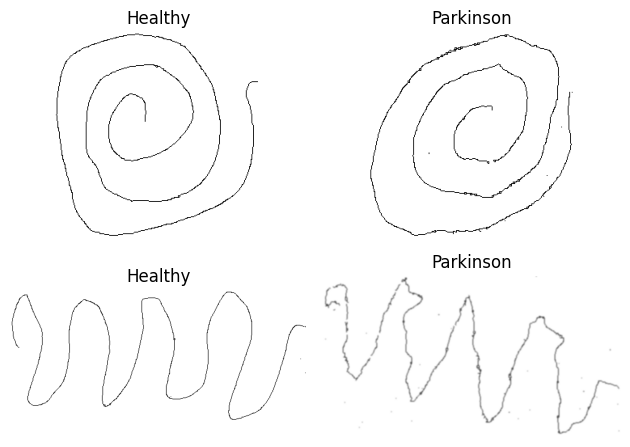

In [42]:
# Load and display data images
imagePaths = list(paths.list_images('/content/drive/MyDrive/to_be_submitted/augment_thin_blur'))
image1 = cv2.imread(imagePaths[70])
# image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.imread(imagePaths[72])
# image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.imread(imagePaths[280])
# image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.imread(imagePaths[400])
# image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# Display the first image
plt.subplot(2, 2, 1)
plt.imshow(image1)
plt.title('Healthy')
plt.axis('off')

# Display the second image
plt.subplot(2, 2, 2)
plt.imshow(image2)
plt.title('Parkinson')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image3)
plt.title('Healthy')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image4)
plt.title('Parkinson')
plt.axis('off')

plt.tight_layout()
plt.show()

## VGG-16

In [6]:
import keras
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten
from keras import optimizers
from keras.models import Sequential
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [7]:
from keras.applications.vgg16 import VGG16, preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                   validation_split=0.2,
                                   )

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                  validation_split=0.2,
                                  )

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/training',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 subset="training",
                                                 class_mode = 'categorical')


validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

#These lines calculate the number of batches (steps) that will be processed during each epoch of training, validation, and testing, respectively
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 114 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
# The same but for Wave drawings
training_set_2 = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/wave_tg_thin&blur/training',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 subset="training",
                                                 class_mode = 'categorical')

validation_set_2 = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/wave_tg_thin&blur/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set_2 = test_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/wave_tg_thin&blur/testing',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

#These lines calculate the number of batches (steps) that will be processed during each epoch of training, validation, and testing, respectively
STEP_SIZE_TRAIN_2=training_set_2.n//training_set.batch_size
STEP_SIZE_VALID_2=validation_set_2.n//validation_set.batch_size
STEP_SIZE_TEST_2=test_set_2.n//test_set.batch_size

Found 116 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


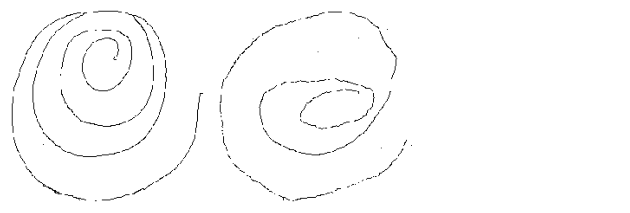

In [43]:
images, labels = next(training_set)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

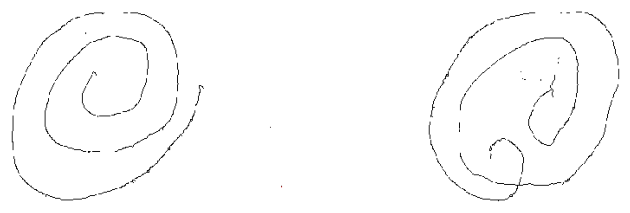

In [44]:
images, labels = next(test_set)

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Using Image 2D Fourier

In [ ]:
# to extract the fourier and save it into a folder
# we uploaded the fourier along with the data in fourier_images/ready_files

# It takes a long time to run that is why we interrupted it
fourier_images_folder = '/content/drive/MyDrive/to_be_submitted/fourier_images'

# Create the Fourier images folder if it doesn't exist
os.makedirs(fourier_images_folder, exist_ok=True)

# Iterate over the images in the training set
for images, labels in training_set:
    # Iterate over each image in the batch
    for i in range(len(images)):
        # Get the image and its corresponding label
        image = images[i]
        label = labels[i]

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Apply the Fourier transform
        fourier_image = np.fft.fft2(grayscale_image)
        fourier_image = np.fft.fftshift(fourier_image)

        # Calculate the magnitude spectrum
        magnitude_spectrum = np.log(np.abs(fourier_image) + 1)
        magnitude_spectrum = (magnitude_spectrum / np.max(magnitude_spectrum)) * 255
        magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

        # Save the Fourier image with a modified filename
        filename = 'fourier_' + str(label) + '_' + str(i) + '.png'
        save_path = os.path.join(fourier_images_folder, filename)
        cv2.imwrite(save_path, magnitude_spectrum)

        # Print the saved file path for reference
        # print('Saved:', save_path)

KeyboardInterrupt: ignored

## VGG-16

In [48]:
IMAGE_SIZE = [224, 224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False

# just flatten the 2D output and no hidden layers (we tried hidden layers but the performance dropped)
x = Flatten()(vgg.output)
prediction = Dense(2, activation='sigmoid')(x) # output layer

model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='binary_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [49]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau

# ReduceLROnPlateau improved the performance greatly, it reduces the learning rate when a metric (validation loss) has stopped improving
# for 5 consecutive epochs (patience parameter) by a factor of the square root of 0.1
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=1.0e-5)

# to save the model's weights while training
checkpoint = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]
start = datetime.now()
history = model.fit(training_set,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs = 15, verbose=5,
                    validation_data = validation_set,
                    validation_steps = STEP_SIZE_VALID)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/15
Epoch 2/15
Epoch 3/15
Epoch 4/15
Epoch 5/15
Epoch 6/15
Epoch 7/15
Epoch 8/15
Epoch 9/15
Epoch 10/15
Epoch 11/15
Epoch 12/15
Epoch 13/15
Epoch 14/15
Epoch 15/15
Training completed in time:  0:00:18.656852


In [50]:
score = model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
if len(score) > 2:
    print('Test Precision:', score[2])
    print('Test Recall:', score[3])

20/20 [==============================] - 1s 28ms/step - loss: 1.5444 - accuracy: 0.8667
Test Loss: 1.5443657636642456
Test accuracy: 0.8666666746139526


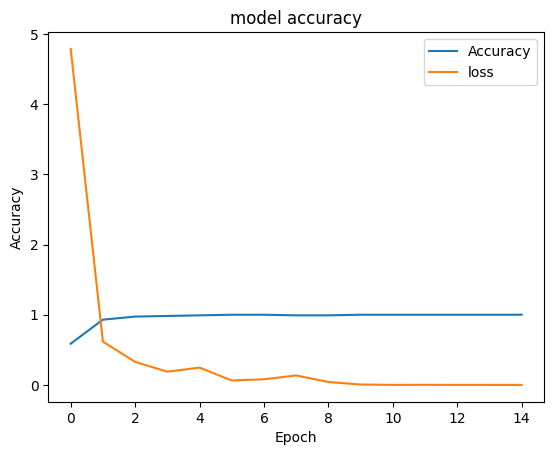

In [53]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

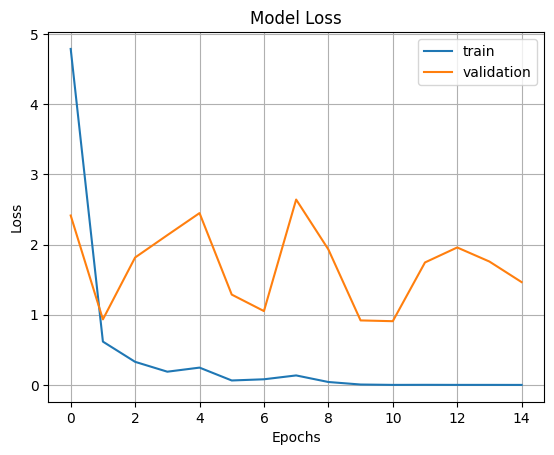

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_predictions = model.predict(test_set, steps=STEP_SIZE_VALID)
y_true = validation_set.classes
y_pred = np.argmax(test_predictions, axis=1)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)
print(test_predictions)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

4/4 [==============================] - 0s 31ms/step
[[4.3381124e-08 9.9702245e-01]
 [1.8468528e-16 1.0000000e+00]
 [9.9999964e-01 6.7472232e-13]
 [3.8026162e-06 6.7051843e-02]
 [5.8748798e-33 1.0000000e+00]
 [5.8065048e-17 1.0000000e+00]
 [7.2975812e-19 1.0000000e+00]
 [1.0000000e+00 7.8182187e-13]
 [7.0065969e-14 9.9995804e-01]
 [1.0000000e+00 7.0295458e-09]
 [4.2544271e-22 1.0000000e+00]
 [9.9821281e-01 5.4646907e-03]]
Accuracy: 0.3333
Confusion Matrix:
[[1 5]
 [3 3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.17      0.20         6
           1       0.38      0.50      0.43         6

    accuracy                           0.33        12
   macro avg       0.31      0.33      0.31        12
weighted avg       0.31      0.33      0.31        12



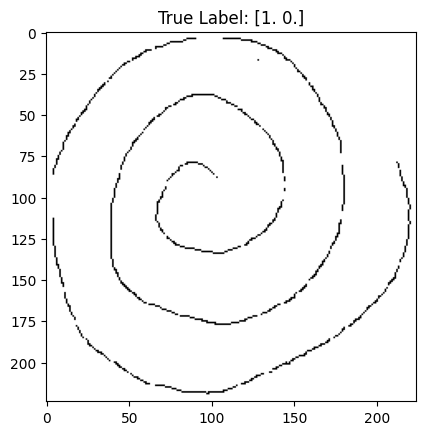

1/1 [==============================] - 0s 45ms/step
Predicted Output:
[1. 0.]


In [41]:
# Choose a random image from the test set
sample_image, true_label = test_set.next()

# Display the image
plt.imshow(sample_image[0])
plt.title(f'True Label: {true_label[0]}')
plt.show()

# Predict the output using the trained model
predicted_output = model.predict(sample_image)

# Print the prediction
print("Predicted Output:")
print(predicted_output[0])

### Wave Drawings using VGG-16

In [ ]:
vgg_2 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg_2.layers:
 layer.trainable = False

# Again no hidden layers
x_2 = Flatten()(vgg_2.output)
prediction_2 = Dense(2, activation='sigmoid')(x_2) # output layer
model_2 = Model(inputs=vgg_2.input, outputs=prediction_2)

model_2.compile(loss='binary_crossentropy',
                    optimizer=optimizers.RMSprop(),
                    metrics=['accuracy'])

In [ ]:
# using the same technique reducing the learning rate upon no improvement
lr_reducer_2 = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-5)
checkpoint_2 = ModelCheckpoint(filepath='mymodel.h5',
                               verbose=1, save_best_only=True)
callbacks_2 = [checkpoint_2, lr_reducer_2]
start = datetime.now()
history_2 = model.fit(training_set_2,
                    steps_per_epoch=STEP_SIZE_TRAIN_2,
                    epochs = 30, verbose=5,
                    validation_data = validation_set_2,
                    validation_steps = STEP_SIZE_VALID_2)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30
Training completed in time:  0:00:32.975411


In [ ]:
score = model_2.evaluate(test_set_2)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
if len(score) > 2:
    print('Test Precision:', score[2])
    print('Test Recall:', score[3])

20/20 [==============================] - 1s 21ms/step - loss: 2.5574 - accuracy: 0.5833
Test Loss: 2.5573890209198
Test accuracy: 0.5833333134651184


Note how the performance of the wave models is much worse, this was the case with the other models and also in the papers we encountered during our literature review, so our results also support theirs.

## ResNet50

In [55]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
# using a hidden layer of 512 nodes
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
# this is the output layer (2 classes thus 2 nodes, also one hot encoded)
resnet_model.add(Dense(2, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [56]:
resnet_model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])

In [57]:
from keras.applications.resnet50 import preprocess_input

# using only photometric data augmentation to not mess with the data as geometric transformations will not be suitable
# patients had to draw certain shapes with certain sizes acc to the study guidelines, changing these dimensions should affect the model judgement

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  brightness_range=[0.5, 1.5],
                                   validation_split=0.2,
                                   )

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  brightness_range=[0.5, 1.5],
                                   validation_split=0.2,
                                  )

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/training',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 subset="training",
                                                 class_mode = 'categorical')


validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

#These lines calculate the number of batches (steps) that will be processed during each epoch of training, validation, and testing, respectively
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 114 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [58]:
epochs=16

In [59]:
history = resnet_model.fit(
  training_set,
  validation_data=validation_set,
  epochs=epochs
)

Epoch 1/16
38/38 [==============================] - 6s 52ms/step - loss: 0.6275 - accuracy: 0.6316 - val_loss: 0.8107 - val_accuracy: 0.6667
Epoch 2/16
38/38 [==============================] - 1s 23ms/step - loss: 0.6221 - accuracy: 0.6930 - val_loss: 0.4966 - val_accuracy: 0.8333
Epoch 3/16
38/38 [==============================] - 1s 23ms/step - loss: 0.5633 - accuracy: 0.7632 - val_loss: 0.4566 - val_accuracy: 0.7500
Epoch 4/16
38/38 [==============================] - 1s 23ms/step - loss: 0.5048 - accuracy: 0.7456 - val_loss: 0.5124 - val_accuracy: 0.6667
Epoch 5/16
38/38 [==============================] - 1s 36ms/step - loss: 0.4620 - accuracy: 0.8070 - val_loss: 0.5332 - val_accuracy: 0.8333
Epoch 6/16
38/38 [==============================] - 1s 36ms/step - loss: 0.4576 - accuracy: 0.7807 - val_loss: 0.4544 - val_accuracy: 0.6667
Epoch 7/16
38/38 [==============================] - 1s 36ms/step - loss: 0.4560 - accuracy: 0.8070 - val_loss: 0.4373 - val_accuracy: 0.8333
Epoch 8/16
38

In [60]:
score = resnet_model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])
if len(score) > 2:
    print('Test Precision:', score[2])
    print('Test Recall:', score[3])

20/20 [==============================] - 1s 24ms/step - loss: 0.4626 - accuracy: 0.8333
Test Loss: 0.4625890851020813
Test accuracy: 0.8333333134651184


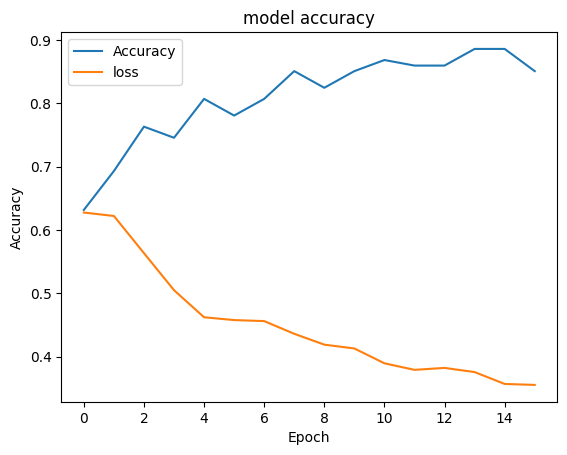

In [61]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","loss"])
plt.show()

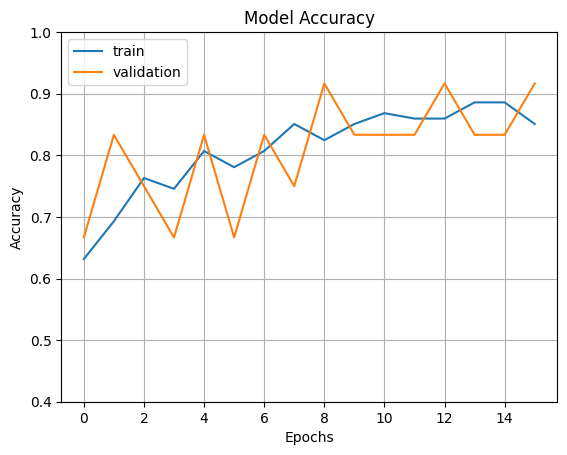

In [62]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

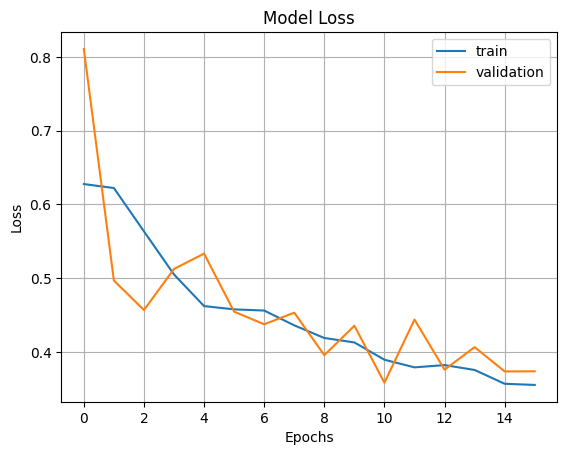

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [64]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_predictions = resnet_model.predict(test_set, steps=STEP_SIZE_VALID)
y_true = validation_set.classes
y_pred = np.argmax(test_predictions, axis=1)

# Calculate additional evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)
print(test_predictions)
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

4/4 [==============================] - 1s 25ms/step
[[0.9621906  0.03780931]
 [0.53407824 0.46592176]
 [0.8738026  0.12619746]
 [0.00588958 0.9941104 ]
 [0.9095485  0.09045148]
 [0.78710526 0.21289475]
 [0.41318494 0.58681506]
 [0.2779928  0.7220072 ]
 [0.35606337 0.6439367 ]
 [0.9330126  0.06698735]
 [0.72903955 0.2709605 ]
 [0.21929845 0.7807016 ]]
Accuracy: 0.7500
Confusion Matrix:
[[5 1]
 [2 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



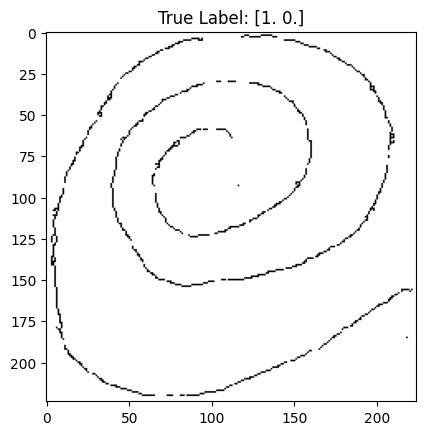

1/1 [==============================] - 1s 867ms/step
Predicted Output:
[0.5993439  0.40065613]


In [65]:
# Choose a random image from the test set
sample_image, true_label = test_set.next()

# Display the image
plt.imshow(sample_image[0])
plt.title(f'True Label: {true_label[0]}')
plt.show()

# Predict the output using the trained model
predicted_output = resnet_model.predict(sample_image)

# Print the prediction
print("Predicted Output:")
print(predicted_output[0])

##DenseNet

In [ ]:
import pandas as pd
import cv2
import random
from tqdm.notebook import tqdm
import plotly
import plotly.express as ex
import plotly.graph_objs as go
%matplotlib inline
# Preprocessing the data
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
import keras
from keras.models import Model,load_model
from keras.layers import Dense, Dropout,Conv2D,Flatten,MaxPooling2D
from keras import backend as K
from keras.layers.experimental import preprocessing

In [ ]:
#Add DenseNet201 layer
model_densetnet = keras.applications.DenseNet201(input_shape=(224,224,3),include_top=False,weights='imagenet',pooling='avg')
model_densetnet.trainable = False

In [ ]:
input = model_densetnet.input
# Rebuild top
x = keras.layers.Dense(128,activation="relu")(model_densetnet.output)
x = keras.layers.BatchNormalization()(x)
top_dropout_rate = 0.2
x = keras.layers.Dropout(top_dropout_rate, name="top_dropout")(x)
output = keras.layers.Dense(2, activation='softmax')(x)
model = keras.Model(inputs=input, outputs=output)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_7[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

In [ ]:
# Define the data generators with the specific preprocessing function
from keras.applications.densenet import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  validation_split=0.2,
                                  horizontal_flip = True)

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/training',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 subset="training",
                                                 class_mode = 'categorical')


validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

#These lines calculate the number of batches (steps) that will be processed during each epoch of training, validation, and testing, respectively
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 114 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
history = model.fit(
    training_set,
    epochs=20,
    validation_data=validation_set
)

Epoch 1/20
38/38 [==============================] - 52s 894ms/step - loss: 0.8375 - accuracy: 0.6404 - val_loss: 1.1387 - val_accuracy: 0.5000
Epoch 2/20
38/38 [==============================] - 29s 766ms/step - loss: 0.6943 - accuracy: 0.6491 - val_loss: 1.1263 - val_accuracy: 0.5000
Epoch 3/20
38/38 [==============================] - 27s 713ms/step - loss: 0.7460 - accuracy: 0.6316 - val_loss: 0.5794 - val_accuracy: 0.5833
Epoch 4/20
38/38 [==============================] - 29s 761ms/step - loss: 0.5467 - accuracy: 0.7807 - val_loss: 0.9972 - val_accuracy: 0.5833
Epoch 5/20
38/38 [==============================] - 29s 772ms/step - loss: 0.4138 - accuracy: 0.8246 - val_loss: 0.8450 - val_accuracy: 0.6667
Epoch 6/20
38/38 [==============================] - 29s 766ms/step - loss: 0.4570 - accuracy: 0.7895 - val_loss: 1.0429 - val_accuracy: 0.6667
Epoch 7/20
38/38 [==============================] - 28s 713ms/step - loss: 0.4894 - accuracy: 0.7895 - val_loss: 0.4568 - val_accuracy: 0.7500

In [ ]:
model.save("DenseNet201.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



##Plot loss

In [ ]:
# summarize history for metric
fig=go.Figure()
fig.add_trace(go.Scatter(x=[n for n in range(1,21)],
                         y=history.history['loss'],
                         name="Training Loss",
                         mode="markers+lines",
                         marker=dict(color='green')))
fig.add_trace(go.Scatter(x=[n for n in range(1,21)],
                         y=history.history['val_loss'],
                         name="Validation Loss",
                         mode="markers+lines",
                         marker=dict(color='red')))
fig.update_layout(title="DenseNet : Model Metric - Training and Validation",
                  xaxis_title="Epochs",
                  yaxis_title="Loss",
                  template="plotly_dark",
                 )

fig.show()

##Plot accuracy

In [ ]:
# summarize history for metric
fig=go.Figure()
fig.add_trace(go.Scatter(x=[n for n in range(1,21)],
                         y=history.history['accuracy'],
                         name="Training Acc",
                         mode="markers+lines",
                         marker=dict(color='green')))
fig.add_trace(go.Scatter(x=[n for n in range(1,21)],
                         y=history.history['val_accuracy'],
                         name="Validation Acc",
                         mode="markers+lines",
                         marker=dict(color='red')))
fig.update_layout(title="DenseNet : Model Metric - Training and Validation",
                  xaxis_title="Epochs",
                  yaxis_title="Accuracy",
                  template="plotly_dark",
                 )
fig.show()

In [ ]:
# Evaluate the model
scores = model.evaluate(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

20/20 [==============================] - 14s 698ms/step - loss: 0.4624 - accuracy: 0.7667
Loss of the model: 0.46
Test Accuracy: 76.67%


###Xception

In [ ]:
base_model = tf.keras.applications.Xception(weights="imagenet", input_shape=(224, 224, 3), include_top=False)
# Freeze the base_model
base_model.trainable = False

In [ ]:
# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
inputs = base_model.input
#x = tf.keras.layers.Dense(128,activation="relu")(base_model.output)
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = tf.keras.layers.Dense(2)(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_9[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
# Define the data generators with the specific preprocessing function
from keras.applications.xception import preprocess_input

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  validation_split=0.2,
                                  horizontal_flip = True,
                                   )

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                  brightness_range=[0.5, 1.5],  # Adjust brightness between 0.5 and 1.5
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  validation_split=0.2,
                                  horizontal_flip = True
                                  )

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/training',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                 subset="training",
                                                 class_mode = 'categorical')


validation_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                                 target_size = (224, 224),
                                                 batch_size = 3,
                                                subset="validation",
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/to_be_submitted/augment_thin_blur/spiral_tg_thin&blur/testing',
                                            target_size = (224, 224),
                                            batch_size = 3,
                                            class_mode = 'categorical')

#These lines calculate the number of batches (steps) that will be processed during each epoch of training, validation, and testing, respectively
STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
STEP_SIZE_TEST=test_set.n//test_set.batch_size

Found 114 images belonging to 2 classes.
Found 12 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 14

In [ ]:
history=model.fit(training_set, epochs=epochs, validation_data=validation_set)

Epoch 1/20
38/38 [==============================] - 33s 781ms/step - loss: 0.4964 - accuracy: 0.7281 - val_loss: 0.6707 - val_accuracy: 0.6667
Epoch 2/20
38/38 [==============================] - 28s 751ms/step - loss: 1.1193 - accuracy: 0.8158 - val_loss: 0.4461 - val_accuracy: 0.7500
Epoch 3/20
38/38 [==============================] - 28s 749ms/step - loss: 1.6233 - accuracy: 0.8246 - val_loss: 2.8820 - val_accuracy: 0.8333
Epoch 4/20
38/38 [==============================] - 30s 804ms/step - loss: 2.6688 - accuracy: 0.7895 - val_loss: 2.7665 - val_accuracy: 0.8333
Epoch 5/20
38/38 [==============================] - 32s 856ms/step - loss: 1.1655 - accuracy: 0.7807 - val_loss: 0.4837 - val_accuracy: 0.6667
Epoch 6/20
38/38 [==============================] - 29s 753ms/step - loss: 0.6379 - accuracy: 0.7193 - val_loss: 0.4685 - val_accuracy: 0.7500
Epoch 7/20
38/38 [==============================] - 29s 756ms/step - loss: 0.8544 - accuracy: 0.8421 - val_loss: 1.7715 - val_accuracy: 0.8333

In [ ]:
# Evaluate the model
scores = model.evaluate(test_set)
print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

20/20 [==============================] - 14s 707ms/step - loss: 2.4551 - accuracy: 0.5000
Loss of the model: 2.46
Test Accuracy: 50.00%


In [ ]:
model.save("xception.h5")

##Plot loss

In [ ]:
# summarize history for metric
fig=go.Figure()
fig.add_trace(go.Scatter(x=[n for n in range(1,epochs)],
                         y=history.history['loss'],
                         name="Training loss",
                         mode="markers+lines",
                         marker=dict(color='green')))
fig.add_trace(go.Scatter(x=[n for n in range(1,epochs)],
                         y=history.history['val_loss'],
                         name="Validation loss",
                         mode="markers+lines",
                         marker=dict(color='red')))
fig.update_layout(title="Xception : Model Metric - Training and Validation",
                  xaxis_title="Epochs",
                  yaxis_title="Loss",
                  template="plotly_dark",
                 )

fig.show()

##Plot accuracy

In [ ]:
# summarize history for metric
fig=go.Figure()
fig.add_trace(go.Scatter(x=[n for n in range(1,epochs)],
                         y=history.history['accuracy'],
                         name="Training accuracy",
                         mode="markers+lines",
                         marker=dict(color='green')))
fig.add_trace(go.Scatter(x=[n for n in range(1,epochs)],
                         y=history.history['val_accuracy'],
                         name="Validation accuracy",
                         mode="markers+lines",
                         marker=dict(color='red')))
fig.update_layout(title="Xception : Model Metric - Training and Validation",
                  xaxis_title="Epochs",
                  yaxis_title="Loss",
                  template="plotly_dark",
                 )

fig.show()